# YOLO V5 and V6

In [1]:
import pandas as pd
import torch
import os
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import pathlib
from IPython.display import display, Image
import cv2

In [2]:
%cd /scratch/xw10/jj8584

/scratch/xw10/jj8584


/scratch/sa4/test/miniconda3/envs/TEST4/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
V5 = YOLO('yolov5x6u.pt')

In [7]:
#V6 = YOLO('yolov6-l.pt')  #x: [1.00, 1.25, 512]

In [4]:
params = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov5x6u.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
    ,'val': True # specifically train the model
    ,'hsv_h': 0.02,
     'hsv_s': 0.5,
     'hsv_v': 0.3,
     'degrees': 5.0,
     'translate': 0.05,
     'scale': 0.3,
     'shear': 0.0,
     'perspective': 0.0,
     'flipud': 0.0,
     'fliplr': 0.3,
     'mosaic': 0.5,
     'mixup': 0.0,
     'label_smoothing': 0.15,
     'box': 10.0,
     'cls': 2.0,
     'dfl': 2.0
}

In [5]:
results_V5 = V5.train(**params)

New https://pypi.org/project/ultralytics/8.2.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov5x6u.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 175 weight(decay=0.0), 184 weight(decay=0.0005), 183 bias(decay=0.0)
Image sizes 448 train, 448 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      9.81G      3.833      52.21       3.91        202        448: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         73        967          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      9.92G       3.74      10.88        3.6        258        448: 100%|██████████| 48/48 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]

                   all         73        967     0.0083      0.222    0.00718    0.00229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      9.88G      3.725      10.28       3.67        206        448: 100%|██████████| 48/48 [00:12<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         73        967   0.000928      0.282   0.000888   0.000368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      9.87G      3.695      11.47      3.768        216        448: 100%|██████████| 48/48 [00:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         73        967    0.00868      0.232     0.0141    0.00246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25        10G      3.729      10.95      3.842        207        448: 100%|██████████| 48/48 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         73        967     0.0067      0.179    0.00633    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      9.83G      3.609      10.18      3.624        172        448: 100%|██████████| 48/48 [00:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]

                   all         73        967     0.0067      0.179    0.00633    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      9.84G      3.506      10.32      3.604        216        448: 100%|██████████| 48/48 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]

                   all         73        967      0.011       0.39     0.0243    0.00824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      9.88G      3.601      11.88      3.661        242        448: 100%|██████████| 48/48 [00:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         73        967     0.0683     0.0648     0.0367     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      9.85G      3.462      9.896      3.441        232        448: 100%|██████████| 48/48 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]

                   all         73        967     0.0113      0.404     0.0107    0.00305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      9.85G      3.358      9.765      3.415        237        448: 100%|██████████| 48/48 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]

                   all         73        967    0.00502      0.134    0.00363    0.00135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      9.92G      3.387      10.32      3.225        180        448: 100%|██████████| 48/48 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         73        967     0.0624      0.183     0.0469     0.0113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      9.84G      3.135      8.869      3.016        233        448: 100%|██████████| 48/48 [00:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]

                   all         73        967     0.0152      0.503     0.0151    0.00441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      9.88G      3.209      8.802       3.08        207        448: 100%|██████████| 48/48 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]

                   all         73        967      0.206      0.352      0.188     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      9.83G      2.955      7.817      2.888        199        448: 100%|██████████| 48/48 [00:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]

                   all         73        967     0.0123      0.328     0.0547     0.0217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      9.86G      2.765      6.982      2.662        246        448: 100%|██████████| 48/48 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         73        967     0.0408       0.49      0.182     0.0571


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      9.84G      2.514      6.386      2.528        157        448: 100%|██████████| 48/48 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]

                   all         73        967       0.28      0.479      0.271      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      9.82G      2.391      5.881      2.425        180        448: 100%|██████████| 48/48 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         73        967     0.0124      0.333      0.151     0.0632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      9.84G      2.315      5.425      2.355        172        448: 100%|██████████| 48/48 [00:11<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

                   all         73        967     0.0124      0.333      0.104     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       9.9G      2.275      5.262      2.309        170        448: 100%|██████████| 48/48 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]

                   all         73        967     0.0125      0.333      0.187     0.0895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      9.83G      2.207      5.022      2.236        168        448: 100%|██████████| 48/48 [00:11<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         73        967      0.192      0.363      0.292      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      9.83G      2.161      4.929      2.217        161        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]

                   all         73        967      0.346      0.377      0.375      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      9.84G      2.099      4.658      2.153        180        448: 100%|██████████| 48/48 [00:11<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]

                   all         73        967      0.324      0.552      0.455      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      9.83G      2.068      4.523      2.124        171        448: 100%|██████████| 48/48 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]

                   all         73        967      0.259      0.495      0.416      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      9.91G      2.009      4.417      2.092        194        448: 100%|██████████| 48/48 [00:11<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]

                   all         73        967      0.233      0.547      0.432       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      9.83G      1.997        4.4      2.096        214        448: 100%|██████████| 48/48 [00:11<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]

                   all         73        967      0.527      0.684      0.653      0.307



25 epochs completed in 0.107 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 311.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 311.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
YOLOv5x6u summary (fused): 463 layers, 155377804 parameters, 0 gradients, 250.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]


                   all         73        967      0.527      0.684      0.653      0.307
             Platelets         73         76      0.588       0.75      0.692      0.249
                   RBC         73        819     0.0375      0.998      0.632      0.334
                   WBC         73         72      0.957      0.306      0.636      0.339
Speed: 0.3ms preprocess, 7.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


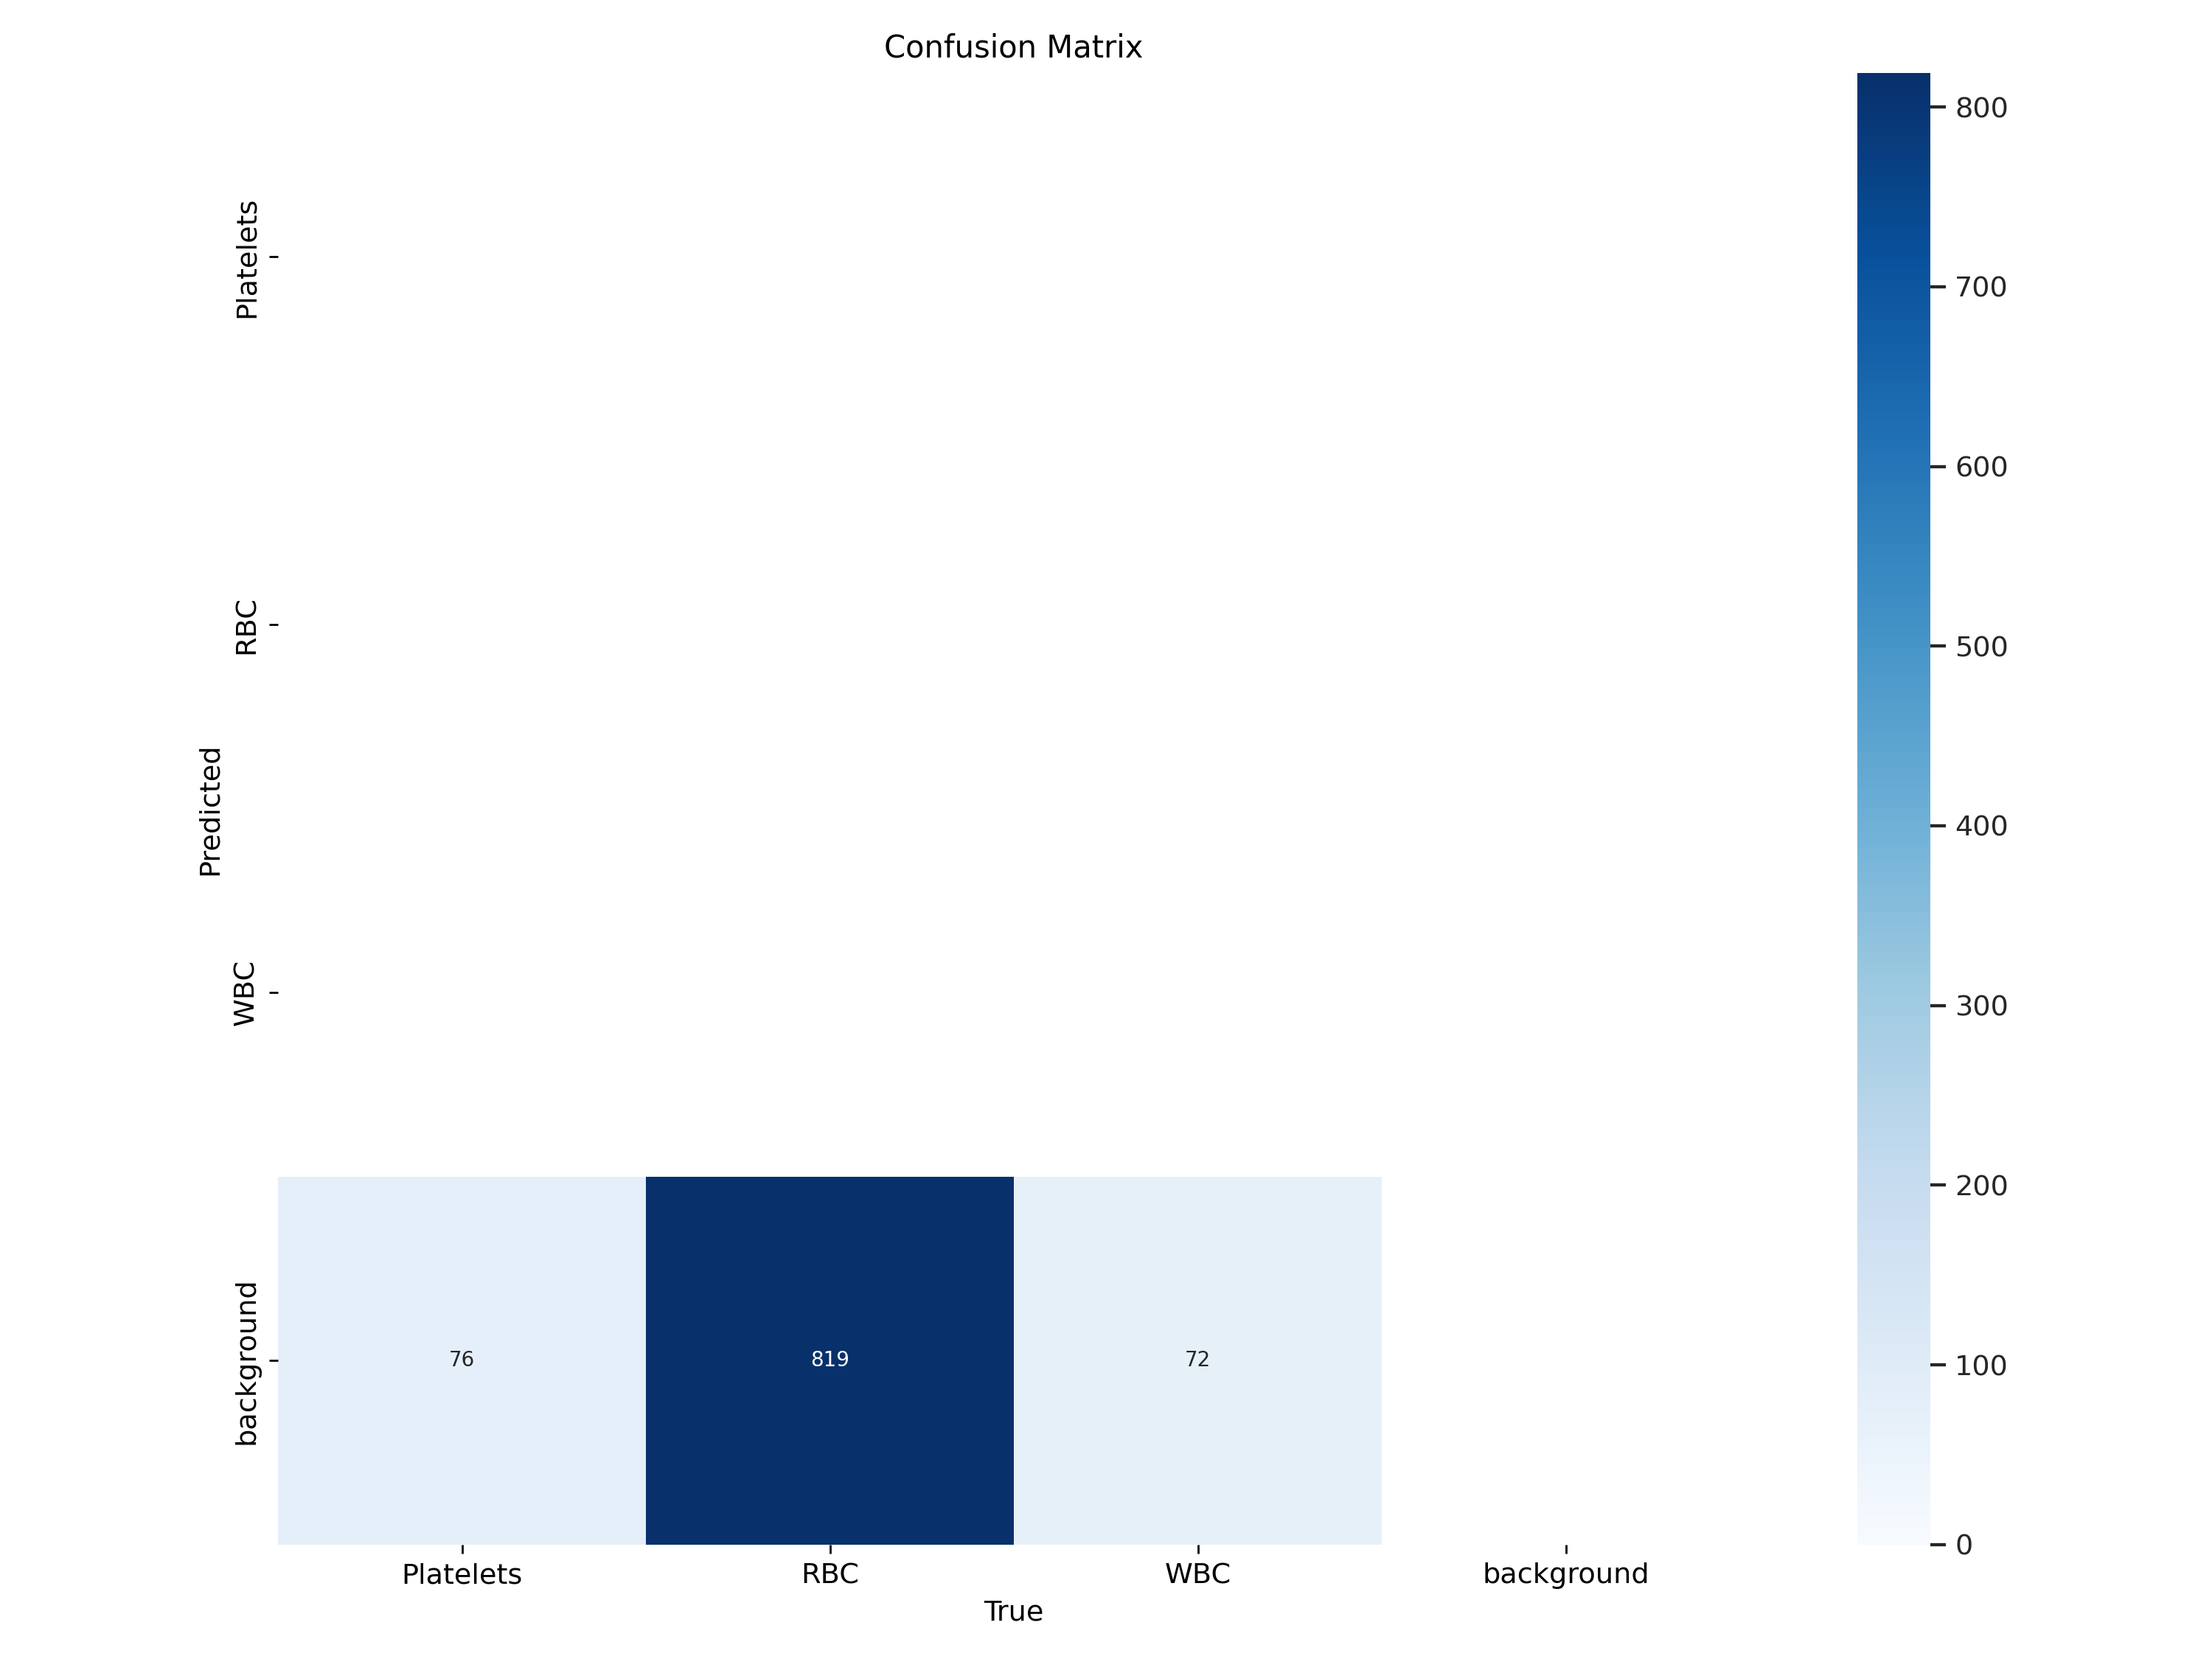

In [6]:
Image(filename=f'runs/detect/V5/train_V53004/confusion_matrix.png')

**COMMENTS**

- Similar to YoloV8 when training on full paramters but with Val = True
- Model not willing to make predictions

## Validation = False

In [7]:
params2 = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov5x6u.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
    ,'val': False # specifically train the model
    ,'hsv_h': 0.02,
     'hsv_s': 0.5,
     'hsv_v': 0.3,
     'degrees': 5.0,
     'translate': 0.05,
     'scale': 0.3,
     'shear': 0.0,
     'perspective': 0.0,
     'flipud': 0.0,
     'fliplr': 0.3,
     'mosaic': 0.5,
     'mixup': 0.0,
     'label_smoothing': 0.15,
     'box': 10.0,
     'cls': 2.0,
     'dfl': 2.0
}
results_V5_2 = V5.train(**params2)

New https://pypi.org/project/ultralytics/8.2.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov5x6u.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 175 weight(decay=0.0), 184 weight(decay=0.0005), 183 bias(decay=0.0)
Image sizes 448 train, 448 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      9.82G      2.324      5.244      2.293        202        448: 100%|██████████| 48/48 [00:13<00:00,  3.67it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      9.87G      2.359      5.529      2.324        258        448: 100%|██████████| 48/48 [00:12<00:00,  3.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25        10G      2.346      5.454      2.313        206        448: 100%|██████████| 48/48 [00:12<00:00,  3.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      9.91G      2.399      5.478      2.328        216        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      9.87G       2.36        5.3      2.317        207        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      9.84G      2.294      5.396      2.262        172        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25        10G      2.234      5.174      2.227        216        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      9.87G      2.173      4.966      2.177        242        448: 100%|██████████| 48/48 [00:11<00:00,  4.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25        10G      2.135      4.775      2.153        232        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      9.86G      2.111      4.706      2.134        237        448: 100%|██████████| 48/48 [00:11<00:00,  4.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25        10G      2.131      4.676      2.141        180        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25        10G      2.067      4.603      2.077        233        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      9.65G      2.063      4.628       2.07        207        448: 100%|██████████| 48/48 [00:11<00:00,  4.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      9.87G      2.018      4.403      2.041        199        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      9.87G      2.007      4.393      2.039        246        448: 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      9.86G      1.892      4.081      1.961        157        448: 100%|██████████| 48/48 [00:12<00:00,  3.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      9.83G      1.859      4.044      1.952        180        448: 100%|██████████| 48/48 [00:11<00:00,  4.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      9.87G      1.831      3.963      1.939        172        448: 100%|██████████| 48/48 [00:11<00:00,  4.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      9.87G      1.819      3.869      1.913        170        448: 100%|██████████| 48/48 [00:11<00:00,  4.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      9.86G      1.779      3.794      1.897        168        448: 100%|██████████| 48/48 [00:11<00:00,  4.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      9.86G      1.778       3.78        1.9        161        448: 100%|██████████| 48/48 [00:11<00:00,  4.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      9.86G      1.743      3.667      1.864        180        448: 100%|██████████| 48/48 [00:11<00:00,  4.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      9.83G      1.722      3.611      1.853        171        448: 100%|██████████| 48/48 [00:11<00:00,  4.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      9.87G      1.699      3.551      1.833        194        448: 100%|██████████| 48/48 [00:11<00:00,  4.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      9.84G      1.696      3.561      1.835        214        448: 100%|██████████| 48/48 [00:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]


                   all         73        967     0.0123       0.33      0.166     0.0529

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 311.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 311.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
YOLOv5x6u summary (fused): 463 layers, 155377804 parameters, 0 gradients, 250.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]


                   all         73        967     0.0124       0.33      0.167     0.0531
             Platelets         73         76          0          0          0          0
                   RBC         73        819     0.0371       0.99      0.501      0.159
                   WBC         73         72          0          0          0          0
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


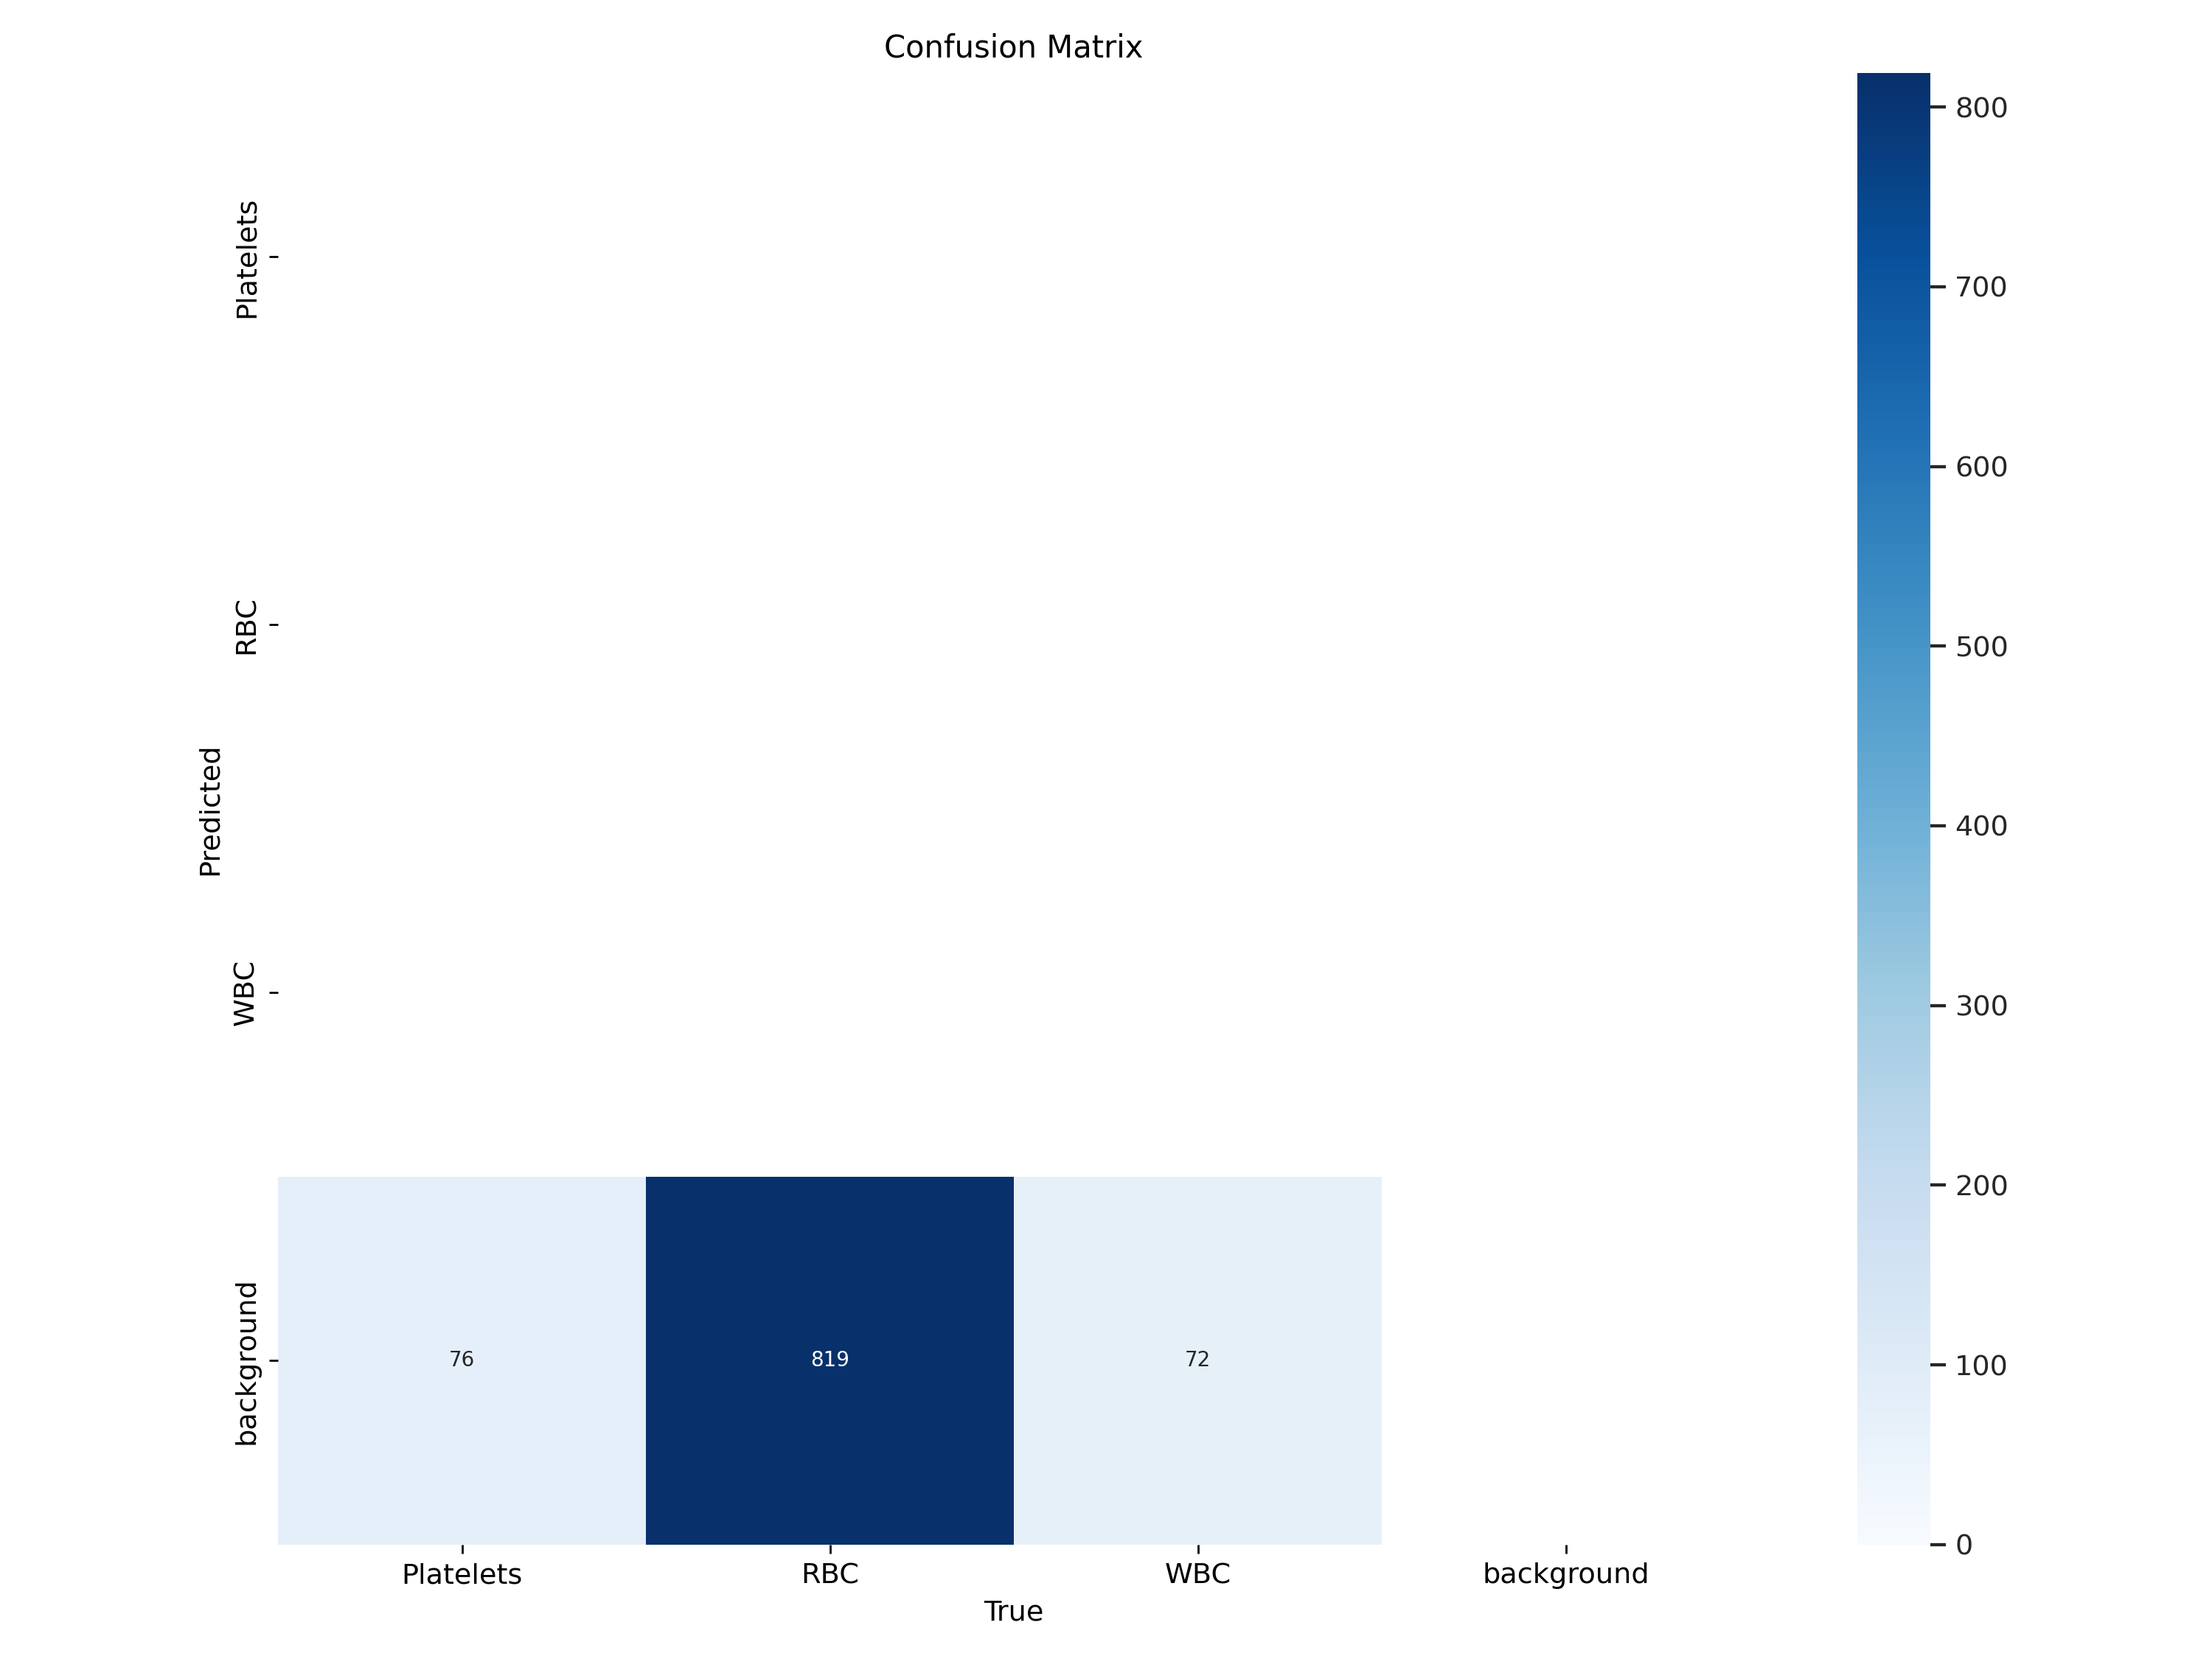

In [8]:
Image(filename=f'runs/detect/V5/train_V53004_full_params/confusion_matrix.png')

In [9]:
V5_val = YOLO('runs/detect/V5/train_V53004_full_params/weights/best.pt')
metrics = V5_val.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
YOLOv5x6u summary (fused): 463 layers, 155377804 parameters, 0 gradients, 250.3 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]


                   all         73        967     0.0123      0.329      0.165     0.0526
             Platelets         73         76          0          0          0          0
                   RBC         73        819      0.037      0.988      0.496      0.158
                   WBC         73         72          0          0          0          0
Speed: 0.2ms preprocess, 15.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val2


In [10]:
V5_val_base = YOLO('runs/detect/V5/train_V53004/weights/best.pt')
metrics = V5_val_base.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
YOLOv5x6u summary (fused): 463 layers, 155377804 parameters, 0 gradients, 250.3 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


                   all         73        967      0.524       0.68      0.645      0.306
             Platelets         73         76      0.577      0.737      0.666      0.244
                   RBC         73        819     0.0375      0.998      0.632      0.335
                   WBC         73         72      0.957      0.306      0.636      0.339
Speed: 0.1ms preprocess, 13.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val2
